Автор:     Шестаков Михаил Сергеевич  
Telegram:  https://t.me/mshestakov1  
Телефон:   +7(950)035-55-38  
email:     mikhail-shestakov-2022@bk.ru  

# Анализ постов на сервисе StackOverflow за 2008 год

**Содержание:**  
1. [подключения к базе данных](#section_1)  
2. [Задание 1](#section_2)  
3. [Задание 1](#section_3)   
4. [Задание 1](#section_4)  
5. [Задание 1](#section_5)  
6. [Задание 1](#section_6)   
7. [Задание 1](#section_7)  
8. [Задание 1](#section_8)  
9. [Задание 1](#section_9)   
10. [Задание 1](#section_10)  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

Создаем запрос:

In [6]:
# напишите запрос
query = '''
SELECT DISTINCT DATE_TRUNC('MONTH', creation_date)::date AS month_date,
       SUM(views_count) AS total_views
  FROM stackoverflow.posts
 WHERE EXTRACT('YEAR' FROM creation_date) = 2008
 GROUP BY DATE_TRUNC('MONTH', creation_date)::date
 ORDER BY total_views DESC
'''

# выполните запрос
df_1 = pd.read_sql_query(query, con=engine)

In [7]:
df_1

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Строим график распределения просмотров по месяцам:

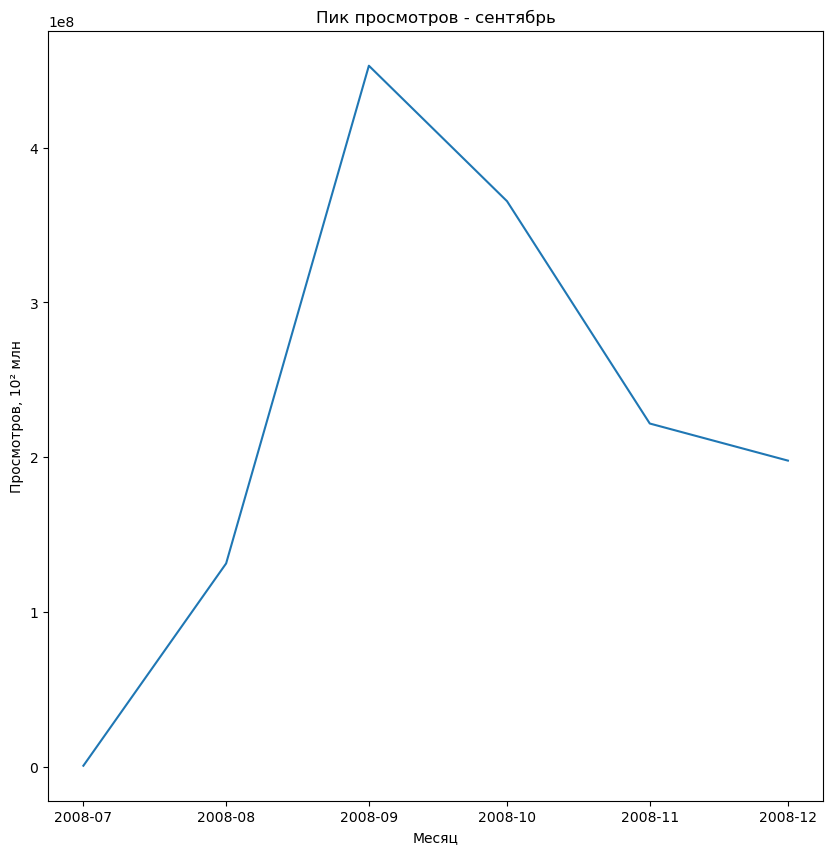

In [8]:
df_1_sort = df_1.sort_values('month_date')
plt.figure(figsize=(10,10))
ax = plt.plot(df_1_sort['month_date'], df_1_sort['total_views'])
plt.title('Пик просмотров - сентябрь')
plt.ylabel('Просмотров, 10\u00B2 млн')
plt.xlabel('Месяц')
plt.show()

Сервис stackoverflow запущен в июле 2008 года: 31 июля 2008 года Джефф Этвуд, один из основателей сервиса, разослал приглашения своим подписчикам принять участие в закрытом бета-тестировании нового веб-сайта, ограничив его использование теми, кто желает протестировать новое программное обеспечение. В июле - сентябре количество просмотров возрастает с 0.67 до 452.92 млн: в сентябре сервис стал общедоступным.  
С сентября по декабрь, при работе сервиса в "боевом" режиме, количество просмотров снижается до 197.79 млн.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

Создаем запрос:

In [9]:
# напишите запрос
query = '''
SELECT u.display_name,
       COUNT(DISTINCT u.id)
  FROM stackoverflow.users AS u
       JOIN stackoverflow.posts AS p ON u.id=p.user_id
       JOIN stackoverflow.post_types AS t ON p.post_type_id=t.id
 WHERE CAST(p.creation_date AS DATE) BETWEEN CAST(u.creation_date AS DATE) AND CAST(u.creation_date AS DATE) + INTERVAL '1 MONTH'
   AND t.type = 'Answer'
 GROUP BY u.display_name
HAVING COUNT(p.parent_id) > 100
 ORDER BY display_name
'''

# выполните запрос
df_2 = pd.read_sql_query(query, con=engine)

In [10]:
df_2

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


Проверяем, какое число пользователей из выбранных, имеют дублирующиеся имена (display_name):

In [11]:
df2_double = df_2.loc[df_2['count'] > 1].shape[0]
df2_all = df_2.shape[0]
print('Количество пользователей с дублирующимися именами: {} ({:.2%}).'.format(df2_double, 1 - (df2_all - df2_double) / df2_all))

Количество пользователей с дублирующимися именами: 19 (24.05%).


# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

Создаем запрос:

In [12]:
# напишите запрос
query = '''
WITH profile AS (
SELECT DISTINCT user_id
  FROM stackoverflow.posts
 WHERE CAST(DATE_TRUNC('MONTH', creation_date) AS DATE) = '2008-12-01'
   AND user_id IN (SELECT DISTINCT id
                     FROM stackoverflow.users
                    WHERE CAST(DATE_TRUNC('MONTH', creation_date) AS DATE) = '2008-09-01'
                    )
 )
    
SELECT DISTINCT
       CAST(DATE_TRUNC('MONTH', creation_date) AS DATE) AS month,
       COUNT(*) OVER (PARTITION BY CAST(DATE_TRUNC('MONTH', creation_date) AS DATE)) AS count
  FROM stackoverflow.posts AS p
       JOIN profile AS pr ON pr.user_id = p.user_id
 ORDER BY CAST(DATE_TRUNC('MONTH', creation_date) AS DATE) DESC
'''

# выполните запрос
df_3 = pd.read_sql_query(query, con=engine)

In [13]:
df_3

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Строим график распределения постов по месяцам:

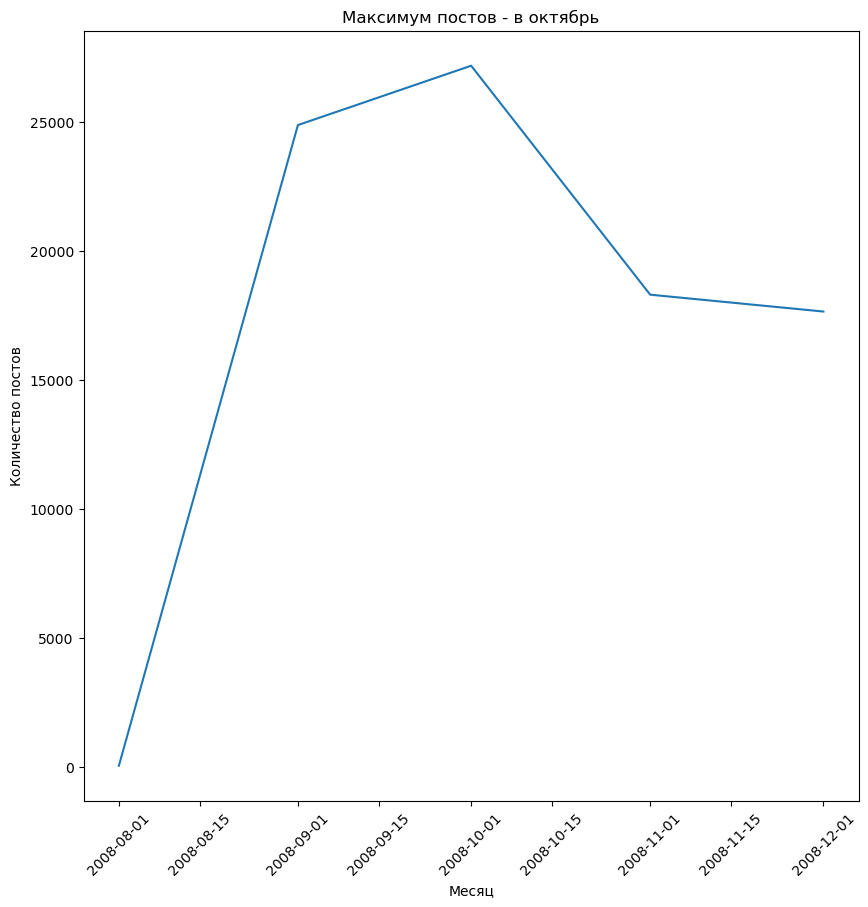

In [14]:
plt.figure(figsize=(10,10))
ax = plt.plot(df_3['month'], df_3['count'])
plt.title('Максимум постов - в октябрь')
plt.ylabel('Количество постов')
plt.xlabel('Месяц')
plt.xticks(rotation = 45)
plt.show()

У пользователей, зарегистрированных в сентябре, есть комментарии за август. Это может быть результатом сбоя при переходе сервиса из закрытого бета-тестирования в общедоступный рабочий режим в сентябре 2008 года.

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

Создаем запрос:

In [15]:
# напишите запрос
query = '''
SELECT DISTINCT
       user_id,
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
  FROM stackoverflow.posts
'''
# выполните запрос
df_4 = pd.read_sql_query(query, con=engine)

In [16]:
df_4

,user_id,creation_date,views_count,sum
0,574,2008-08-07 16:39:36,0,0
1,122,2008-08-11 03:31:52,0,205195
2,20,2008-10-06 22:08:51,0,3010
3,936,2008-12-08 23:10:29,0,39945
4,71,2008-10-28 22:36:05,0,299727
...,...,...,...,...
243791,39603,2008-11-24 14:34:18,0,0
243792,12039,2008-11-05 12:33:03,0,3154
243793,5619,2008-10-24 22:13:56,0,2342784
243794,38265,2008-11-21 23:03:40,0,0


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

Создаем запрос:

In [17]:
# напишите запрос
query = '''
WITH profile AS (
SELECT DISTINCT
       user_id,
       CAST(p.creation_date AS DATE),
       COUNT(*) OVER (PARTITION BY user_id, CAST(p.creation_date AS DATE)) AS posts_cnt
  FROM stackoverflow.users AS u
       JOIN stackoverflow.posts AS p ON u.id = p.user_id
 WHERE CAST(DATE_TRUNC('MONTH', p.creation_date) AS DATE) = '2008-08-01'
 )
  
SELECT user_id,
       SUM(posts_cnt) / COUNT(*) AS avg_daily
  FROM profile
 GROUP BY user_id
HAVING SUM(posts_cnt) > 120
 ORDER BY avg_daily
'''

# выполните запрос
df_5 = pd.read_sql_query(query, con=engine)

In [18]:
df_5

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые написали более 120 постов за август. Используя этот запрос в качестве подзапроса для среза, найдите и сохраните во временную таблицу идентификаторы нужных пользователей, дни августа и количество постов в день. В основном запросе сгруппируйте данные по пользователям и найдите для каждого из них среднее количество постов.
</details>

# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

Создаем запрос:

In [19]:
# напишите запрос
query = '''
WITH posted AS (
SELECT DISTINCT user_id,
       COUNT(*) OVER (PARTITION BY user_id) AS days_cnt
  FROM stackoverflow.posts
 WHERE CAST(creation_date AS DATE) BETWEEN '2008-12-01' AND '2008-12-07'
 GROUP BY user_id, CAST(creation_date AS DATE)
 )

SELECT CAST(AVG(days_cnt) AS integer) AS result
  FROM posted
'''

# выполните запрос
df_6 = pd.read_sql_query(query, con=engine)

In [20]:
df_6

,result
0,2


На начало декабря в среднем за неделю пользователь публикует 2 поста.

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

Создаем запрос:

In [21]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date,
       LAG(to_char(creation_date, 'Month'), 2) OVER (PARTITION BY user_id ORDER BY creation_date) AS second_last_month
  FROM stackoverflow.posts
 GROUP BY user_id,
          creation_date
'''

# выполните запрос
df_7 = pd.read_sql_query(query, con=engine)

In [22]:
df_7

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

Создаем запрос:

In [23]:
# напишите запрос
query = '''
WITH profile AS (
SELECT user_id,
       DATE_TRUNC('MONTH', creation_date) AS session_date,
       MIN(DATE_TRUNC('MONTH', creation_date)) OVER (PARTITION BY user_id) AS cohort_dt
  FROM stackoverflow.posts
  ),
    
cohort AS (
SELECT cohort_dt,
       session_date,
       COUNT(DISTINCT user_id) AS users_cnt,
       FIRST_VALUE(COUNT(DISTINCT user_id)) OVER (PARTITION BY cohort_dt ORDER BY session_date) AS cohort_users_cnt
  FROM profile
 GROUP BY cohort_dt, session_date
 ORDER BY cohort_dt, session_date
 )

SELECT *,
       ROUND(100 * CAST(users_cnt AS numeric) / cohort_users_cnt, 2) AS retention_rate
 FROM cohort
'''

# выполните запрос
df_8 = pd.read_sql_query(query, con=engine)

In [24]:
df_8

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


Строим тепловую карту Retention Rate:

C:\Users\bond_\AppData\Local\Temp\ipykernel_29296\1773228465.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  retention = df_8.pivot('cohort_dt', 'session_date', 'retention_rate')


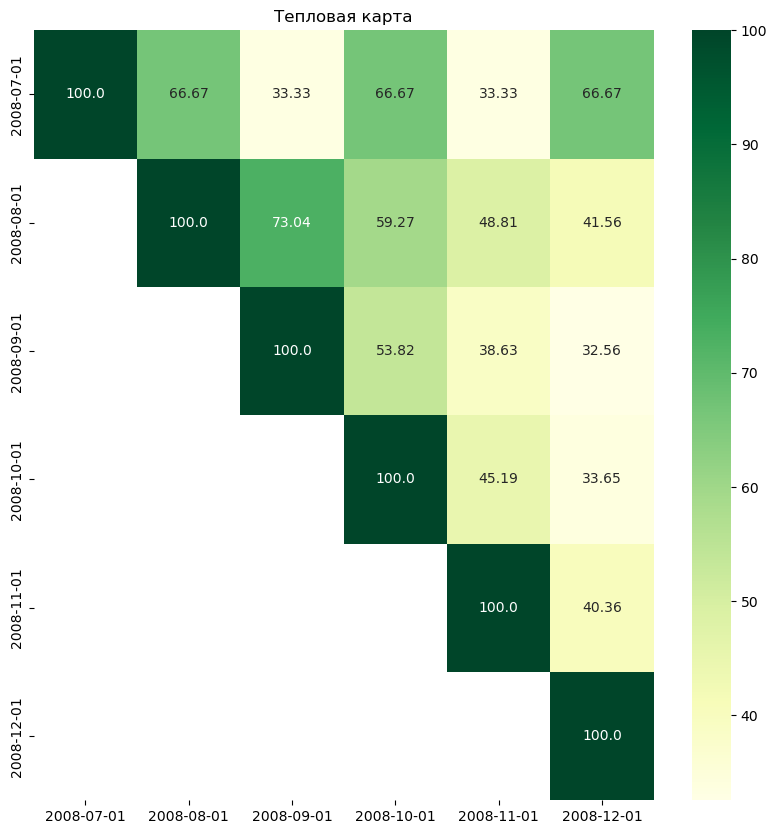

In [25]:
# строим хитмэп
retention = df_8.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]


plt.figure(figsize=(10, 10)) # задаём размер графика
sns.heatmap(retention, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='',
            cmap="YlGn") # задаём исходный формат
plt.title('Тепловая карта') # название графика
plt.show() 

В когорте за июль 2008 всего три пользователя - данные по ней не показательны.
Для остальных когорт Retention Rate стабильно снижается как от когорты к когорте, так и в течение лайфтайма.
Для августовской когорты Retention Rate наибольшее: пользователи, учувствовавшие в тестировании, активней пользуются сервисом — это изначально заинтересованная в сервисе аудитория. С сентября, по окончании тестового периода, происходит формирование "ядра" пользователей, отсеивается нецелевая аудитория, о чем свидетельствует снижение Retention Rate. К декабрю, судя по стабилизации количества публикаций и просмотров, "ядро" можно считать сформированным.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [26]:
# напишите запрос
query = '''
WITH post_distr AS (
SELECT CAST(EXTRACT(MONTH FROM creation_date) AS integer) AS creation_month,
       COUNT(*) AS posts_count
  FROM stackoverflow.posts
 WHERE CAST(DATE_TRUNC('MONTH', creation_date) AS DATE) BETWEEN '2008-09-01' AND '2008-12-01'
 GROUP BY EXTRACT(MONTH FROM creation_date)
 )
    
SELECT creation_month,
       posts_count,
       ROUND(100 * (CAST(posts_count AS numeric) / LAG(posts_count) OVER (ORDER BY creation_month) - 1), 2) AS percentage
  FROM post_distr
'''

# выполните запрос
df_9 = pd.read_sql_query(query, con=engine)

In [27]:
df_9

,creation_month,posts_count,percentage
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


Строим круговую диаграмму с количеством постов по месяцам.

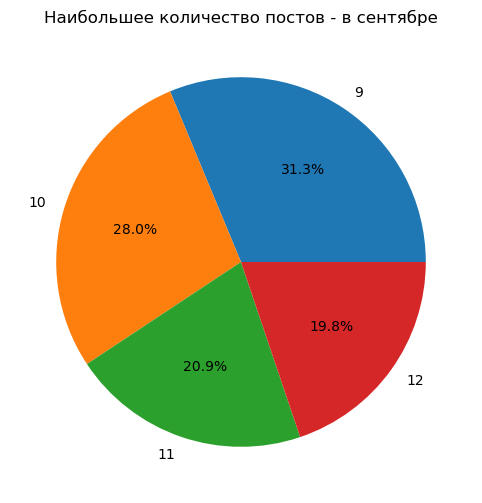

In [28]:
# постройте круговую диаграмму с количеством постов по месяцам
plt.figure(figsize = (8,6))
plt.pie(df_9['posts_count'], labels=df_9['creation_month'], autopct='%1.1f%%')
plt.title(label = 'Наибольшее количество постов - в сентябре')
plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

Создаем запрос:

In [29]:
# напишите запрос
query = '''
WITH post_cnt AS (
SELECT user_id,
       COUNT(*) AS cnt
  FROM stackoverflow.posts
 GROUP BY user_id
 ORDER BY cnt DESC
 LIMIT 1
 )
    
SELECT DISTINCT
       CAST(EXTRACT(WEEK FROM p.creation_date) AS integer) AS week_creation,
       MAX(p.creation_date) OVER (PARTITION BY EXTRACT(WEEK FROM p.creation_date)) AS creation_date
  FROM stackoverflow.posts AS p
       JOIN post_cnt AS pc ON p.user_id=pc.user_id
 WHERE CAST(DATE_TRUNC('MONTH', p.creation_date) AS DATE) = '2008-10-01'
'''

# выполните запрос
df_10 = pd.read_sql_query(query, con=engine)

In [30]:
df_10

,week_creation,creation_date
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01
